In [1]:
import uproot, random, pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

## Calculate Evis of 0.511MeV gamma

In [23]:
## integral
def integral1(Energy, re_prob, NonL_ratio):
    sum = 0;
    if(len(Energy)!=len(re_prob) or len(Energy)!=len(NonL_ratio) or len(re_prob)!=len(NonL_ratio)):
        print('array length different!!!')
        return 0;
    for i in range(len(Energy)-1):
        tmp1 = Energy[i]*re_prob[i]*NonL_ratio[i]
        tmp2 = Energy[i+1]*re_prob[i+1]*NonL_ratio[i+1]
        area = (tmp1+tmp2)*(Energy[i+1]-Energy[i])*100/2.
        sum += area
    return sum

In [17]:
## denominator integral
def integral2(Energy, re_prob):
    sum = 0;
    if(len(Energy)!=len(re_prob)):
        print('array length different!!!')
        return 0;
    for i in range(len(Energy)-1):
        tmp1 = Energy[i]*re_prob[i]
        tmp2 = Energy[i+1]*re_prob[i+1]
        area = (tmp1+tmp2)*(Energy[i+1]-Energy[i])*100/2.
        #print(tmp1+tmp2,end=',')
        sum += area
    return sum

In [3]:
# read electron Nonlinearity from esatr calc
df = pd.read_table("../../../Simulation/Nonlinearity/electron/Calc_NonL.txt")
electron_NL_estar = df['nonl'].values

In [58]:
# read electron Nonlinearity from esatr calc
df = pd.read_table("../../../Simulation/Nonlinearity/electron/MC_NonL.txt")
electron_NL_G4 = df['nonl'].values

In [59]:
## read primary e+- distribution for 511keV gamma
file = uproot.open("../../../Simulation/Nonlinearity/gamma/rootfiles/511keV_gamma.root")
elecKE = file["evt"].array("ElectronKE")
cont, edge = np.histogram(elecKE.flatten(), bins=800, range=(0,8));

Energy = np.arange(0.01,8,0.01);
center = []
for i in range(len(edge)-1):
    center.append((edge[i]+edge[i+1])/2.)

re_prob = [];
for i in range(len(center)-1):
    re_prob.append((cont[i]+cont[i+1])/2.)
#re_prob1 = re_prob1 / (integral2(Energy, re_prob1) * ElectronKE1.shape[0] / ElectronKE1.flatten().shape[0])  #normalized    
re_prob = re_prob / (integral2(Energy, re_prob) / 0.511)  #normalized with Energy

Evis = integral1(Energy, re_prob, electron_NL_G4)

[]

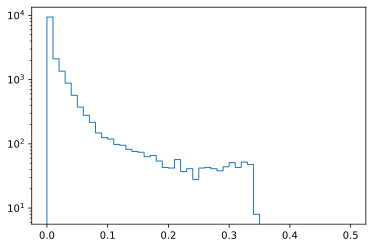

In [16]:
plt.hist(elecKE.flatten(), histtype='step', bins=50, range=(0,0.5));
plt.semilogy()

In [60]:
print("0.511MeV gamma predicted Evis: " + str(round(Evis, 3)) + " with nonL :" + str(round(Evis/0.511, 3)))

0.511MeV gamma predicted Evis: 0.467 with nonL :0.914


## Calculate NonL for positron

In [63]:
## Evis = T * electron_nonL + 2* Evis(0.511 gamma)
Ttrue_positron = [0.5,1,2,4,6,8]; Evis_positron = []; Etrue_positron = [];
energy_bin = [499, ]
for i in Ttrue_positron:
    #print(int(i*100-1))
    Evis_positron.append(i * electron_NL_G4[int(i*100-2)] + 2*Evis)
    Etrue_positron.append(i+2*0.511)

In [64]:
Evis_positron

[1.421241584374306,
 1.9325833859980504,
 2.96595131537645,
 5.035424439933004,
 7.109376469876762,
 9.175735742721162]

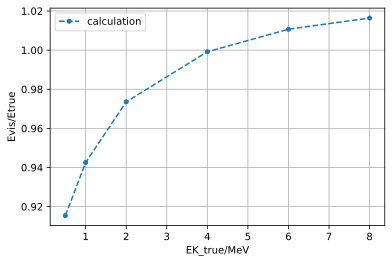

In [42]:
plt.plot(Ttrue_positron, np.array(Evis_positron)/np.array(Etrue_positron), 'o--', ms=4, label='calculation')
plt.legend(); plt.xlabel("EK_true/MeV")
plt.ylabel("Evis/Etrue");
plt.grid(True)

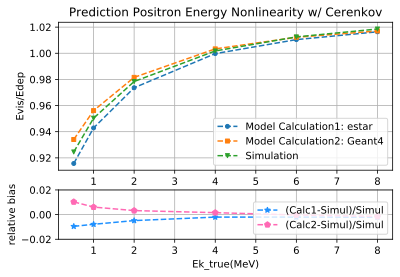

In [70]:
#positron nonlineariy comparison

from pylab import *
from matplotlib import gridspec 
gs = gridspec.GridSpec(2,1,height_ratios=[3,1]) 

Ttrue = [0.511, 1, 2, 4, 6, 8];
MC_nonL = [0.92450744, 0.95034456, 0.97838060, 1.0017635, 1.0124997, 1.0185507]
Evis_positron_estar = [1.39367, 1.90648, 2.94226, 5.020597,7.09519, 9.169967777046036]
Evis_positron_G4 = [1.42162,1.9333, 2.96627, 5.03874, 7.10758, 9.17573]

ax0 = plt.subplot(gs[0])
ax0.plot(Ttrue, np.array(Evis_positron_estar)/np.array(Etrue_positron),'o--',label='Model Calculation1: estar', ms=4)
ax0.plot(Ttrue, np.array(Evis_positron_G4)/np.array(Etrue_positron),'s--',label='Model Calculation2: Geant4', ms=4)
ax0.plot(Ttrue, MC_nonL,'v--',label='Simulation', ms=4)
ax0.legend()
plt.grid(True)
plt.ylabel('Evis/Edep')
plt.title("Prediction Positron Energy Nonlinearity w/ Cerenkov")

ax1 = plt.subplot(gs[1])
ax1.plot(Ttrue, (np.array(Evis_positron_estar)/np.array(Etrue_positron)-np.array(MC_nonL))/np.array(MC_nonL), 
         '*--',ms=6, color='dodgerblue', label='(Calc1-Simul)/Simul')
ax1.plot(Ttrue, (np.array(Evis_positron_G4)/np.array(Etrue_positron)-np.array(MC_nonL))/np.array(MC_nonL), 
         'p--',ms=6, color='hotpink', label='(Calc2-Simul)/Simul')
plt.grid(True)
#plt.yticks(np.arange(0, 1200, step=400))
plt.xlabel('Ek_true(MeV)')
plt.ylabel('relative bias')
plt.ylim(-0.02,0.02)
plt.legend(loc='lower right')

#plt.savefig('compare_totalPE_electron.svg')